In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [276]:
## CSV to pandas DataFrame Import##
import pandas as pd
import os

from tabulate import tabulate
def csv_to_df(filename, filepath=None):
    """
    Extracts major and trace/REE element oxide data from a .csv and organizes it into a pandas DataFrame.
            - Each column is a different oxide/species/category.
            - Each sample is a row in the .csv file.
            - Each sample becomes a row in a pandas DataFrame.
            - Data can be filtered by sample name, oxide name, or special groups:
                - Major elements
                - Trace elements
                - REE elements

    ****At the moment, all data includes the LOI + sum values.

    Parameters:
        - filename: str - name of the .csv file
        - **folderpath: str, optional: path to folder if not sci-data

    Returns:
        pd.DataFrame: The imported data as a pandas DataFrame.
    """
    if filepath is None:
        script_dir = os.path.expanduser('~/PycharmProjects/sci-cluster/sci-data')
        filepath = os.path.join(script_dir, filename)

        df = pd.read_csv(filepath)
        column_names = list(df.columns)

        print(f"Columns:{column_names}")
        print(f"\n .csv file successfully imported.")
    return df

In [417]:
## Test
rawdata = csv_to_df('tuolumnedata_csvready.csv')



Columns:['Sample', 'Type', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2', 'SO3', 'Cl2O-1', 'F2O-1', 'LOI (%)', 'sumMaj+LOI', 'sumAll', 'F >=', 'Cl >=', 'SO3 >=', 'Br >=', 'As >=', 'Ni', 'Cr', 'V', 'Sc', 'Cu', 'Zn', 'Ga', 'Ba', 'Rb', 'Cs', 'Sr', 'Y', 'Zr', 'Hf', 'Nb', 'Ta', 'Mo', 'La', 'Ce', 'Nd', 'Sm', 'Dy', 'Yb', 'Th', 'U', 'Tl', 'Pb', 'Sn', 'Bi', 'Sb']

 .csv file successfully imported.


In [466]:
def extract_MajorOx(df):
    """
    Extracts major element oxides from a pandas DataFrame.

    Places them in a list alongside oxides expected by MELTS as input.

        MAJOR OXIDES:
            - SiO2
            - TiO2
            - Al2O3
            - Fe2O3
            - Cr2O3
            - FeO
            - MnO
            - MgO
            - NiO
            - CoO
            - CaO
            - Na2O
            - K2O
            - P2O5

        VOLATILE PHASES:
            - H2O
            - CO2
            - SO3
            - Cl2O-1
            - F2O-1
    """
    major_oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2', 'SO3', 'Cl2O-1', 'F2O-1']

    major_df = df[major_oxides]
    return major_df

In [467]:
cleaned_df = extract_MajorOx(rawdata)
cleaned_df

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,SO3,Cl2O-1,F2O-1
0,66.066406,0.548861,15.624385,NaN,NaN,3.732880,0.076576,1.524711,NaN,NaN,3.776396,3.642991,3.377294,0.179945,NaN,NaN,NaN,NaN,NaN
1,59.488558,0.885564,16.893312,NaN,NaN,6.088012,0.105994,3.120577,NaN,NaN,5.791956,3.472646,2.432116,0.214490,NaN,NaN,NaN,NaN,NaN
2,63.811922,0.644781,16.617554,NaN,NaN,4.147709,0.085269,1.756226,NaN,NaN,4.521935,4.016627,2.876374,0.219198,NaN,NaN,NaN,NaN,NaN
3,68.591354,0.438112,15.640367,NaN,NaN,2.427771,0.063995,0.777234,NaN,NaN,2.696797,4.550226,3.315973,0.162275,NaN,NaN,NaN,NaN,NaN
4,75.820463,0.081973,12.946199,NaN,NaN,0.663837,0.031223,0.089308,NaN,NaN,0.702542,4.374870,4.009420,0.008794,NaN,NaN,NaN,NaN,NaN
5,67.622928,0.475611,15.900443,NaN,NaN,2.794764,0.056634,0.875509,NaN,NaN,3.407064,4.469777,2.902462,0.195939,NaN,NaN,NaN,NaN,NaN
6,76.363613,0.069413,12.654557,NaN,NaN,0.517922,0.023925,0.054598,NaN,NaN,0.540023,3.972797,4.609559,0.005901,NaN,NaN,NaN,NaN,NaN
7,65.146071,0.546541,16.125992,NaN,NaN,3.654955,0.072742,1.580363,NaN,NaN,3.875722,3.658421,3.755211,0.195418,NaN,NaN,NaN,NaN,NaN
8,76.616213,0.079309,12.481429,NaN,NaN,0.623441,0.026245,0.055272,NaN,NaN,0.530665,3.981179,4.460937,0.003877,NaN,NaN,NaN,NaN,NaN
9,69.494990,0.447260,14.881052,NaN,NaN,2.559606,0.061803,0.804506,NaN,NaN,2.784781,4.268707,3.132743,0.168059,NaN,NaN,NaN,NaN,NaN


### Error calculations for experimental XRF data

In [468]:
error_table = rawdata.iloc[-6:, 2:]
error_table = error_table.fillna(0)
error_table = error_table.replace('n.d.',0)

error_table=error_table.astype(float)
error1 = abs(error_table.iloc[0,:] - error_table.iloc[3,:]) #Absolute value of experimental error
error_table.loc['error1'] = error1

error2 = abs(error_table.iloc[1,:] - error_table.iloc[4,:]) #Absolute value of experimental error
error_table.loc['error2'] = error2

error3 = abs(error_table.iloc[2,:] - error_table.iloc[5,:]) #Absolute value of experimental error
error_table.loc['error3'] = error3

avg_error = (error1 + error2 + error3) / 3
error_table.loc['avg_error'] = avg_error

error_table


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Sm,Dy,Yb,Th,U,Tl,Pb,Sn,Bi,Sb
12,59.015503,1.053682,17.069856,0.0,0.0,5.969633,0.095456,1.488898,0.0,0.0,...,6.115393,4.080115,1.477698,6.487323,2.013917,1.098773,35.246493,1.894397,0.036401,0.598231
13,69.364184,0.499561,15.347999,0.0,0.0,2.475277,0.033927,0.757784,0.0,0.0,...,6.999545,1.999315,2.120038,24.232306,2.257883,0.913954,30.201020,0.000000,0.147520,0.501106
14,64.432948,0.847826,15.265641,0.0,0.0,6.228026,0.153845,1.535866,0.0,0.0,...,3.820768,4.824344,2.502048,1.156596,0.000000,0.153349,4.988662,0.000000,0.036511,0.000000
15,59.380000,1.050000,17.110000,0.0,0.0,6.080000,0.096600,1.508000,0.0,0.0,...,5.764000,3.583000,1.660000,6.350000,1.900000,0.337000,36.350000,4.880000,0.045000,4.240000
16,68.740000,0.479900,15.310000,0.0,0.0,2.382000,0.030600,0.754000,0.0,0.0,...,7.190000,2.278000,0.772000,24.540000,1.964000,0.884000,30.000000,1.720000,0.034000,0.058000
17,64.430000,0.850000,15.190000,0.0,0.0,6.301000,0.154300,1.540000,0.0,0.0,...,3.396000,4.750000,2.949000,0.761000,0.340000,0.106000,5.860000,0.880000,0.004200,0.220000
error1,0.364497,0.003682,0.040144,0.0,0.0,0.110367,0.001144,0.019102,0.0,0.0,...,0.351393,0.497115,0.182302,0.137323,0.113917,0.761773,1.103507,2.985603,0.008599,3.641769
error2,0.624184,0.019661,0.037999,0.0,0.0,0.093277,0.003327,0.003784,0.0,0.0,...,0.190455,0.278685,1.348038,0.307694,0.293883,0.029954,0.201020,1.720000,0.113520,0.443106
error3,0.002948,0.002174,0.075641,0.0,0.0,0.072974,0.000455,0.004134,0.0,0.0,...,0.424768,0.074344,0.446952,0.395596,0.340000,0.047349,0.871338,0.880000,0.032311,0.220000
avg_error,0.330543,0.008506,0.051261,0.0,0.0,0.092206,0.001642,0.009007,0.0,0.0,...,0.322205,0.283381,0.659097,0.280205,0.249267,0.279692,0.725288,1.861868,0.051477,1.434958


In [479]:
cleaned_df = cleaned_df.replace('n.d.',0)
cleaned_df = cleaned_df.fillna(0)
cleaned_df = cleaned_df.astype(float)
cleaned_df.loc['XRF_error'] = avg_error

ValueError: could not convert string to float: 'KHD105H'

In [480]:
cleaned_df

,Sample,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,SO3,Cl2O-1,F2O-1
0,KHD105H,66.066406,0.548861,15.624385,0.0,0.0,3.732880,0.076576,1.524711,0.0,0.0,3.776396,3.642991,3.377294,0.179945,0.0,0.0,0.0,0.0,0.0
1,KKC103B,59.488558,0.885564,16.893312,0.0,0.0,6.088012,0.105994,3.120577,0.0,0.0,5.791956,3.472646,2.432116,0.214490,0.0,0.0,0.0,0.0,0.0
2,KHD107B,63.811922,0.644781,16.617554,0.0,0.0,4.147709,0.085269,1.756226,0.0,0.0,4.521935,4.016627,2.876374,0.219198,0.0,0.0,0.0,0.0,0.0
3,KCP109D,68.591354,0.438112,15.640367,0.0,0.0,2.427771,0.063995,0.777234,0.0,0.0,2.696797,4.550226,3.315973,0.162275,0.0,0.0,0.0,0.0,0.0
4,KCP109C,75.820463,0.081973,12.946199,0.0,0.0,0.663837,0.031223,0.089308,0.0,0.0,0.702542,4.374870,4.009420,0.008794,0.0,0.0,0.0,0.0,0.0
5,KCP114B,67.622928,0.475611,15.900443,0.0,0.0,2.794764,0.056634,0.875509,0.0,0.0,3.407064,4.469777,2.902462,0.195939,0.0,0.0,0.0,0.0,0.0
6,KCP109B,76.363613,0.069413,12.654557,0.0,0.0,0.517922,0.023925,0.054598,0.0,0.0,0.540023,3.972797,4.609559,0.005901,0.0,0.0,0.0,0.0,0.0
7,KHD106B,65.146071,0.546541,16.125992,0.0,0.0,3.654955,0.072742,1.580363,0.0,0.0,3.875722,3.658421,3.755211,0.195418,0.0,0.0,0.0,0.0,0.0
8,KCP109A,76.616213,0.079309,12.481429,0.0,0.0,0.623441,0.026245,0.055272,0.0,0.0,0.530665,3.981179,4.460937,0.003877,0.0,0.0,0.0,0.0,0.0
9,KCP108-M,69.494990,0.447260,14.881052,0.0,0.0,2.559606,0.061803,0.804506,0.0,0.0,2.784781,4.268707,3.132743,0.168059,0.0,0.0,0.0,0.0,0.0


In [175]:
def harker_plotter_sharedX(df, x, y_list, grid_shape=(3, 3), figsize=(15,15)):
    """
    Creates a Harker plot of major element oxides with a shared X-axis (usually SiO2).

    Parameters:
        - x: str - x-axis oxide
        - y_list: list of str - y-axis oxides
        - grid_shape: tuple - shape of the grid for subplots
        - fixsize: tuple - size of the figure
    Returns:
        None
    """
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=figsize)
    axes = axes.flatten()
    print(y_list)
    print(x)

    #
    for sample in y_list:
        print(df[sample])

    return fig, axes





['Sample', 'Type', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5']
4    75.820463
6    76.363613
8    76.616213
Name: SiO2, dtype: float64
4    KCP109C
6    KCP109B
8    KCP109A
Name: Sample, dtype: object
4    aplite
6    aplite
8    aplite
Name: Type, dtype: object
4    75.820463
6    76.363613
8    76.616213
Name: SiO2, dtype: float64
4    0.081973
6    0.069413
8    0.079309
Name: TiO2, dtype: float64
4    12.946199
6    12.654557
8    12.481429
Name: Al2O3, dtype: float64
4    0.0
6    0.0
8    0.0
Name: Fe2O3, dtype: float64
4    0.0
6    0.0
8    0.0
Name: Cr2O3, dtype: float64
4    0.663837
6    0.517922
8    0.623441
Name: FeO, dtype: float64
4    0.031223
6    0.023925
8    0.026245
Name: MnO, dtype: float64
4    0.089308
6    0.054598
8    0.055272
Name: MgO, dtype: float64
4    0.0
6    0.0
8    0.0
Name: NiO, dtype: float64
4    0.0
6    0.0
8    0.0
Name: CoO, dtype: float64
4    0.702542
6    0.540023
8    0.530

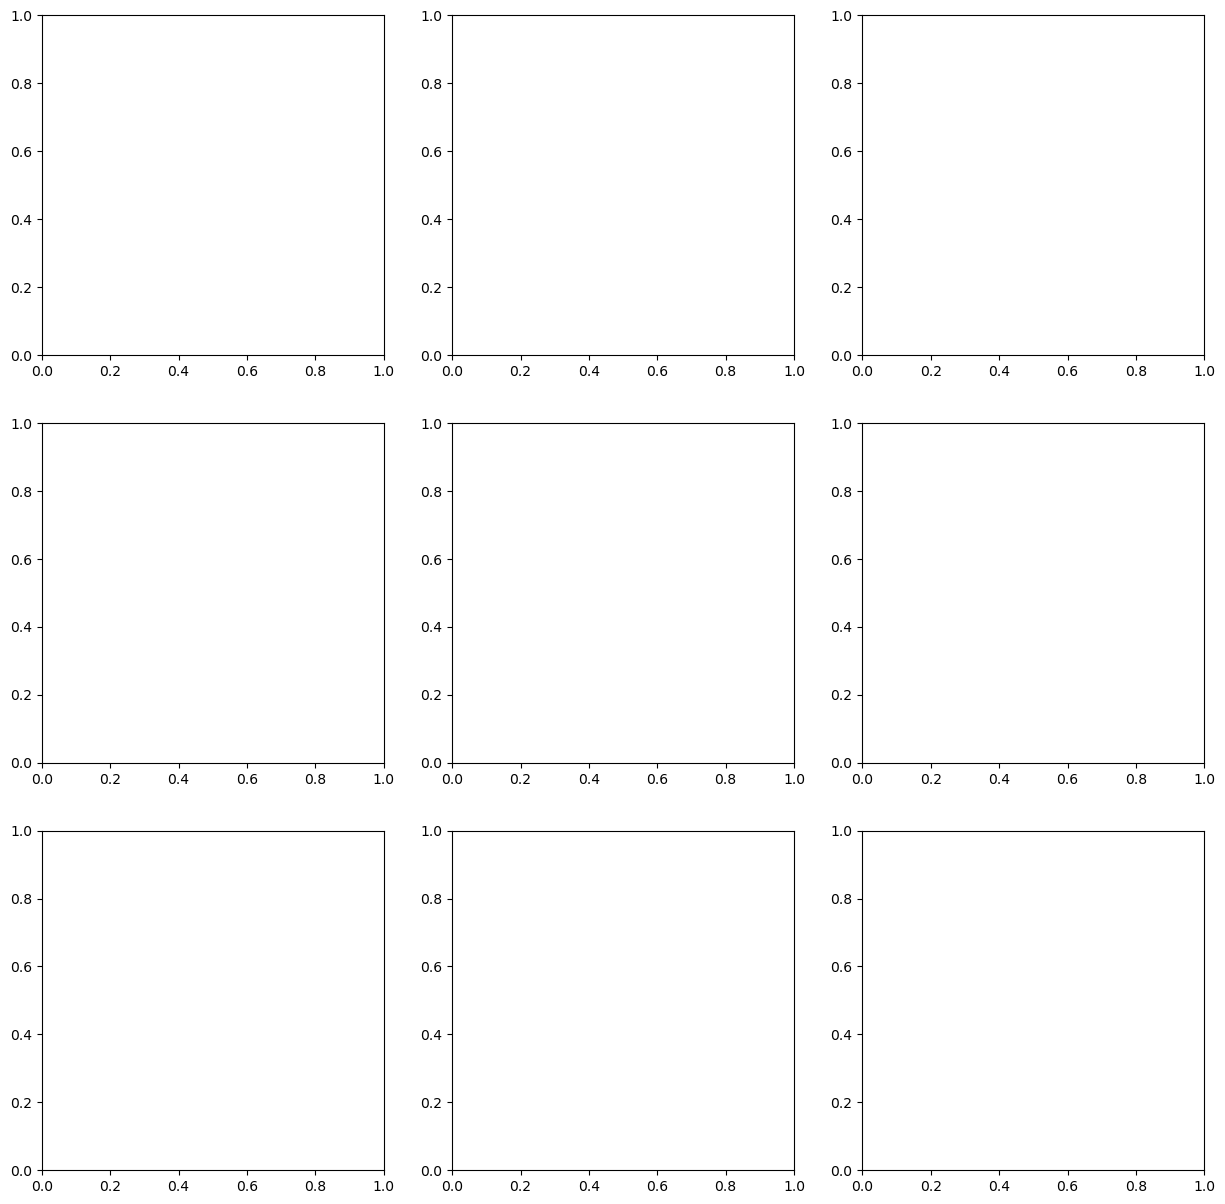

In [180]:

fig, axes = harker_plotter_sharedX(aplite_majorOx, aplite_majorOx['SiO2'], list(aplite_majorOx[1:]))
